# Support Vector Machines - Ch. 9 Lab

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

%matplotlib inline

##### Define a function to plot a classifier with support vectors.

In [31]:
def plot_svc(svc, X, y, h=0.002, pad=0.25):
    x_min = X[:, 0].min() - pad
    x_max = X[:, 0].max() + pad
    y_min = X[:, 1].min() - pad
    y_max = X[:, 1].max() + pad
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # np.c_ adds a second axis and concatenates the arrays along that axis.
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    
    plt.scatter(X[:, 0], X[:, 1], s=70, c=y, cmap=plt.cm.Paired)
    
    # Support vecotrs are indicated by the the plot's vertical lines.
    sv = svc.support_vectors_
    
    plt.scatter(sv[:, 0], sv[:, 1], c='k', marker='x', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    #plt.tight_layout();
    print('Number of support vectors: ', svc.support_.size)

### 9.6.1 Support Vector Classifier

The `SVC()` function is used when the kernel is linear.

The `c` argument assigns the cost of a violiation to the margin. When `c` small, then margins will be **wide** and many support vectors will be on the margine or will violate the margin. When `c` is large, then the margins will be **narrow** and there were will be few support vectors on the margin or violating the margin.

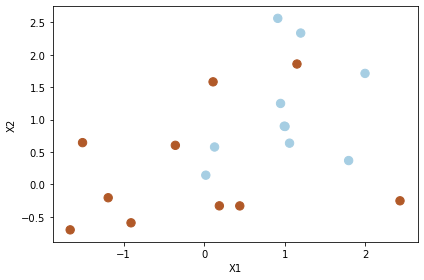

In [46]:
# Generating 20 random obersvations comprised of two features.
# Divide observations into two classes.
np.random.seed(5)
X = np.random.randn(20, 2)
y = np.repeat([1, -1], 10)
X[y == -1] = X[y == -1] + 1


plt.scatter(X[:,0], X[:, 1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.tight_layout();

Number of support vectors:  13


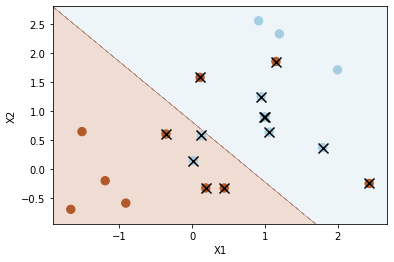

In [47]:
# SVC w/ linear kernel
svc = SVC(C=1.0, kernel='linear')
svc.fit(X, y)

plot_svc(svc, X, y)

The observations with crossess are the **support vectors**. The following array shows the support vectors.

In [48]:
svc.support_

array([10, 11, 13, 14, 15, 16, 17,  0,  1,  2,  4,  6,  8])

Number of support vectors:  16


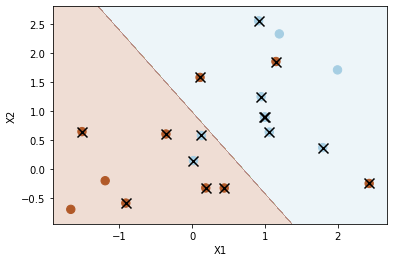

In [49]:
# When using a smaller cost parameter (C=0.1) the margin is wider, resulting in more support vectors.
# More red data points on the "blue" side.
svc2 = SVC(C=0.1, kernel='linear')
svc2.fit(X, y)
plot_svc(svc2, X, y)

Since a smaller `c` is being used, there are more support vectors.

In [50]:
# svc2 support vectors
svc2.support_

array([10, 11, 13, 14, 15, 16, 17, 19,  0,  1,  2,  3,  4,  6,  8,  9])

Use GridSearchCV to identify the optimal value for C.

In [51]:
params = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
svc = SVC(kernel='linear')
clf = GridSearchCV(svc, param_grid=params, cv=10, scoring='accuracy')
clf.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
             scoring='accuracy')

Cross-validation error for each model.

In [52]:
clf.cv_results_

{'mean_fit_time': array([8.99481773e-04, 4.99868393e-04, 6.00028038e-04, 9.98258591e-05,
        3.99708748e-04, 4.99939919e-04, 4.00018692e-04]),
 'std_fit_time': array([0.00053862, 0.00049987, 0.00048992, 0.00029948, 0.00048954,
        0.00049994, 0.00048992]),
 'mean_score_time': array([3.00765038e-04, 5.00035286e-04, 4.99773026e-04, 2.00462341e-04,
        9.99212265e-05, 3.00168991e-04, 3.00073624e-04]),
 'std_score_time': array([0.00045943, 0.00050004, 0.00049977, 0.00040092, 0.00029976,
        0.00045852, 0.00045837]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split1_test_score': array([0.5, 0.5, 0.5, 0. , 0. , 0. , 0. ]),
 'split2_test_score': array([0.5, 0.5, 0

Optimal `C` value

In [53]:
clf.best_params_

{'C': 0.001}

Generate test data

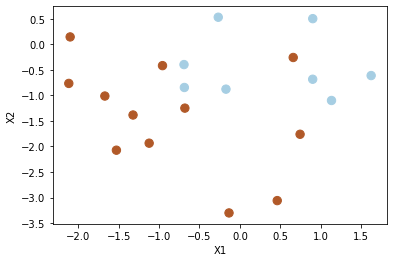

In [54]:
np.random.seed(1)
X_test = np.random.randn(20, 2)
y_test = np.random.choice([-1, 1], 20)
X_test[y_test == 1] = X_test[y_test == 1] - 1

plt.scatter(X_test[:, 0], X_test[:, 1], s=70, c=y_test, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

In [57]:
# svc2 : C = 0.1
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc2.classes_, columns=svc2.classes_)

,-1,1
-1,2,6
1,0,12


In [58]:
svc3 = SVC(C=0.001, kernel='linear')
svc3.fit(X, y)

y_pred = svc3.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc3.classes_, columns=svc3.classes_)

,-1,1
-1,2,6
1,0,12


**RESULT:** Although the different value assumed for a tuning parameter, the two models perform the same.